# Report frequency of the four classes in various data batches
Input: `activity_summary_stats_and_metadata.txt`
Output: `dataBatchClassCovg.svg`, a stacked bar plot showing the frequency of each of the four classes (colors) in each batch of data.

In [1]:
import os
import sys

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from src.mpra_tools import loaders, plot_utils, stat_utils

figures_dir = "Figures"

plot_utils.set_manuscript_params()

/ref/bclab/software/ryan/.conda/envs/active-learning/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


activity_bin,Silencer,Inactive,WeakEnhancer,StrongEnhancer
data_batch_name,,,,
4b,0.629152,0.208882,0.118542,0.043424
4a,0.477082,0.254409,0.192530,0.075979
3,0.100384,0.175777,0.240053,0.483785
2,0.111257,0.235079,0.381937,0.271728
1,0.144386,0.354319,0.332470,0.168825
Random Sampling,0.227309,0.323599,0.223836,0.225257
Genomic,0.153070,0.312151,0.308502,0.226277


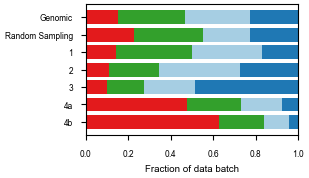

In [2]:
activity_df = loaders.load_data(os.path.join("Data", "activity_summary_stats_and_metadata.txt"))

# Rename the groups for display and group round 3a (37%) and 3b into one
replacements = {
    "CrxMotifMutant": "CRX Motif Muts.",
    "Round2": "2",
    "Round3c": "Random Sampling",
    "Round3a": "3",
    "Round3b": "3",
    "Round4a": "4a",
    "Round4b": "4b",
}

activity_renamed_df = activity_df.replace(replacements)
group_counts = activity_renamed_df.groupby("data_batch_name")["activity_bin"].value_counts().unstack()
# Add together genomic and motif muts to show round 1
group_counts.loc["1"] = group_counts.loc["Genomic"] + group_counts.loc["CRX Motif Muts."]
# Normalize
group_counts = group_counts.div(group_counts.sum(axis=1), axis=0)
row_order = [
    "Genomic",
    "Random Sampling",
    "1",
    "2",
    "3",
    "4a",
    "4b",
]
col_order = [
    "Silencer",
    "Inactive",
    "WeakEnhancer",
    "StrongEnhancer"
]
group_counts = group_counts.loc[row_order[::-1], col_order]
display(group_counts)
fig, ax = plt.subplots(figsize=plot_utils.get_figsize(0.4))
fig = plot_utils.stacked_bar_plots(
    group_counts,
    "Fraction of data batch",
    group_counts.index,
    plot_utils.get_class_colors().values,
    figax=(fig, ax)
)
plot_utils.save_fig(fig, os.path.join(figures_dir, "dataBatchClassCovg"))

In [3]:
activity_df["data_batch_name"].value_counts()

Round4a              59648
NOT_TRAINING_DATA    17040
Round4b              11169
Round3b               7526
Round3c               6335
Genomic               4658
Round3a               4438
CrxMotifMutant        4221
Round2                3820
HighConfidence        2055
Name: data_batch_name, dtype: int64